Importing Required Library

In [87]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import warnings
warnings.filterwarnings("ignore")

# Data Preprocessing

File paths to be imported

In [88]:
feat_file_paths = ["datasets/twitter/12831.feat", "datasets/twitter/78813.feat", "datasets/twitter/356963.feat"]

Generating Common Features

In [89]:
# Initialize an empty set to store common features
common_features_set = set()
common_features_set_initialised = 0
# Iterate through the file paths
for file_path in feat_file_paths:
    with open(file_path + "names", 'r',encoding="utf8") as file:
        dataset = file.read().splitlines()
        features = set(item.split(' ')[1] for item in dataset)
        if common_features_set_initialised==0:
            # If it's the first dataset, set common_features_set to the features of the first dataset
            common_features_set = features
            common_features_set_initialised = 1
        else:
            # Find the intersection with the common features
            common_features_set = common_features_set.intersection(features)

# Create a new dataset with common features and new index numbers
new_common_features_dataset = []
for index, feature in enumerate(common_features_set):
    new_common_features_dataset.append(feature)

# Print the new dataset
for index,item in enumerate(new_common_features_dataset):
    print(index,item)

0 #iPad
1 @wilw:
2 @...
3 @the
4 #fb
5 @twitter
6 @anildash
7 @Twitter
8 @mashable:
9 @BarackObama:
10 @foursquare!
11 @chockenberry
12 #FF
13 #1
14 @The
15 #winning
16 @mashable
17 @BorowitzReport:
18 @timoreilly:
19 #NYC
20 @codinghorror
21 @nytimes


Initialising node with features

In [90]:
class Node:
    def __init__(self, node_number, features):
        self.node_number = node_number
        self.features = features

    def __str__(self):
        return f"Node {self.node_number}: {self.features}"

# Initialize an empty dictionary to store the extracted nodes
nodes_dict = {}
nodes_list = []
no_nodes_repeated = 0
# Loop through the list of .feat file paths
for feat_file_path in feat_file_paths:
    # Open and read the .feat file
    #Reading Featname into a dictionary
    # Initialize an empty dictionary
    key_value_dict = {}

    # Read the dataset from the text file
    with open(feat_file_path+"names", 'r', encoding="utf8") as file:
        for line in file:
            parts = line.strip().split(' ')
            if len(parts) == 2:
                key = parts[1]
                value = parts[0]
                key_value_dict[key] = value
    with open(feat_file_path, "r") as feat_file:
        for line in feat_file:
            # Split the line into values using space as a separator
            values = line.strip().split()

            # The first value is the node number
            node_number = int(values[0])

            # The remaining values are feature indicators (0 or 1)
            # features = list(map(int, values[1:]))
            features=[]
        
            for i in new_common_features_dataset:
                features.append(int(values[int(key_value_dict[i])+1]))            

            # Create a Node instance and append it to the list
            node = Node(node_number, features)
            if node_number in nodes_dict.keys():
                if node.features == nodes_dict[node_number].features :
                    no_nodes_repeated += 1
            nodes_dict[node_number] = node
            nodes_list.append(node_number)
print("No. of nodes repeated : ", no_nodes_repeated)


No. of nodes repeated :  5


Generating adjacency matrix

In [91]:
# Just fo visualising
def edges_to_adjacency_matrices(file_paths):
    adjacency_matrices = []
    edges = []
    for file_path in file_paths:
        # Read edges from the text file
        with open(file_path, 'r') as file:
            edges.extend([line.strip().split() for line in file])

    # Create an featureatrix
    num_nodes = len(nodes_list)
    adjacency_matrix = np.zeros((num_nodes, num_nodes), dtype=int)
    for edge in edges:
        node1, node2 = edge
        index1, index2 = nodes_list.index(int(node1)), nodes_list.index(int(node2))
        adjacency_matrix[index1][index2] = 1  # Directed edge from node1 to node2
    adjacency_matrices.extend(adjacency_matrix)

    return adjacency_matrices

# Example usage with multiple input files:
edges_file_paths = ["datasets/twitter/12831.edges", "datasets/twitter/78813.edges"] # Replace with your file paths
adjacency_matrices = edges_to_adjacency_matrices(edges_file_paths)

print(len(adjacency_matrices))
print(adjacency_matrices)


619
[array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

Visualising the graph

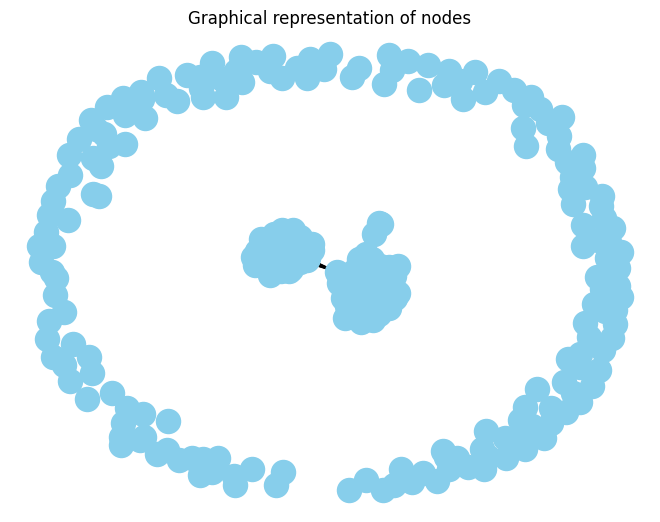

In [92]:
def display_adjacency_matrix(adjacency_matrix):
    G = nx.Graph()
    num_nodes = len(adjacency_matrix)
    
    for i in range(num_nodes):
        G.add_node(i)
    
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if adjacency_matrix[i][j] == 1:
                G.add_edge(i, j)
    
    pos = nx.spring_layout(G, seed=42)  # You can choose different layout algorithms
    
    nx.draw(G, pos, with_labels=False, node_color='skyblue', node_size=300)
    plt.title("Graphical representation of nodes")
    plt.show()

display_adjacency_matrix(adjacency_matrices)

Generating feature matrix

In [93]:
# Print the extracted nodes
print("Nodes:",len(nodes_list))

# for node in nodes_dict.keys():
    # print(nodes_dict[node].features)

feature_matrix =[]
for node in nodes_dict.keys():
    feature_matrix.append(nodes_dict[node].features)

feature_matrix = np.array(feature_matrix)
# print(feature_matrix)
for i in feature_matrix :
    print(i)

Nodes: 619
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 

Preprocessed Feature matrix

In [94]:
print("Shape of Feature Matrix : ",np.shape(feature_matrix))
print("Feature Matrix\n",feature_matrix)

Shape of Feature Matrix :  (614, 22)
Feature Matrix
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# K-means clustering for Feature Matrix

In [95]:
def K_means(feature_matrix,cluster_count,graph_title,returnGraph=True) :
    # Example data (replace with your actual data)
    data = np.array(feature_matrix)
    # print(data)

    # Calculate the mean for each data point
    single_value = np.mean(data, axis=1)
    # print(single_value)

    # Step 1: Generate the Single Feature Vector
    # Replace with your actual data or aggregation method
    # single_value = np.array(single_value)  # 614 nodes with 1 feature each
    # print("Mean: ",single_value)

    single_value = np.sum(data, axis=1)

    # Reshape the single_value array
    single_value = single_value.reshape(-1, 1)

    # Step 2: Choose the Number of Clusters (K)
    k = cluster_count  # Specify the number of clusters you want to create

    # Step 3: Perform K-means Clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(single_value)

    # Step 4: Get Cluster Assignments
    cluster_labels = kmeans.labels_
    if returnGraph == False:
        return cluster_labels,single_value
    # Step 5: Visualize the Clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(range(len(single_value)), single_value, c=cluster_labels, cmap='viridis', marker='o', s=20)
    # plt.legend(title="Legend",bbox_to_anchor=(1.02, 0.88), loc='center left', borderaxespad=0)
    clusters = ['Cluster A', 'Cluster B', 'Cluster C']
    plt.legend(title="Legend",handles=scatter.legend_elements()[0],labels=clusters,bbox_to_anchor=(1.02, 0.88), loc='center left', borderaxespad=0)

    plt.title(graph_title)
    plt.xlabel('Node Index')
    plt.ylabel('Single Feature Value')
    plt.show()

    return cluster_labels,single_value

# Differential Privacy

Generating Noise Matrix

In [96]:
def create_noise_matrix(data,sensitivity, epsilon):
    def add_laplace_noise(data, sensitivity, epsilon):
        n, m = data.shape
        noisy_data = np.copy(data)
        
        for i in range(n):
            for j in range(m):
                sensitivity_i_j = sensitivity[j]
                scale = sensitivity_i_j / epsilon
                noise = np.random.laplace(0, scale)
                noisy_data[i, j] += noise
        
        return noisy_data

    return add_laplace_noise(feature_matrix, sensitivity, epsilon)

# Add Laplace noise to the feature matrix
noisy_feature_matrix = create_noise_matrix(feature_matrix, [0.3]*22, 1.95)

print("Original Feature Matrix:")
print(feature_matrix)

print("Noisy Feature Matrix:")
print(noisy_feature_matrix)

Original Feature Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Noisy Feature Matrix:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [97]:
# # Example data (replace with your actual data)
# # data = np.random.rand(614, 22)  # 614 nodes with 22 features each
# data = np.array(noisy_feature_matrix)
# # print(data)

# # Calculate the mean for each data point
# single_value = np.mean(data, axis=1)
# # print(single_value)

# # Step 1: Generate the Single Feature Vector
# # Replace with your actual data or aggregation method
# single_value = np.array(single_value)  # 614 nodes with 1 feature each

# # Reshape the single_value array
# single_value = single_value.reshape(-1, 1)

# # Step 2: Choose the Number of Clusters (K)
# k = 3  # Specify the number of clusters you want to create

# # Step 3: Perform K-means Clustering
# kmeans = KMeans(n_clusters=k)
# kmeans.fit(single_value)

# # Step 4: Get Cluster Assignments
# cluster_labels = kmeans.labels_

# # Step 5: Visualize the Clusters
# plt.figure(figsize=(10, 6))
# plt.scatter(range(len(single_value)), single_value, c=cluster_labels, cmap='viridis', marker='o', s=20)

# plt.title('K-means Clustering with 3 Clusters')
# plt.xlabel('Node Index')
# plt.ylabel('Single Feature Value')
# plt.show()

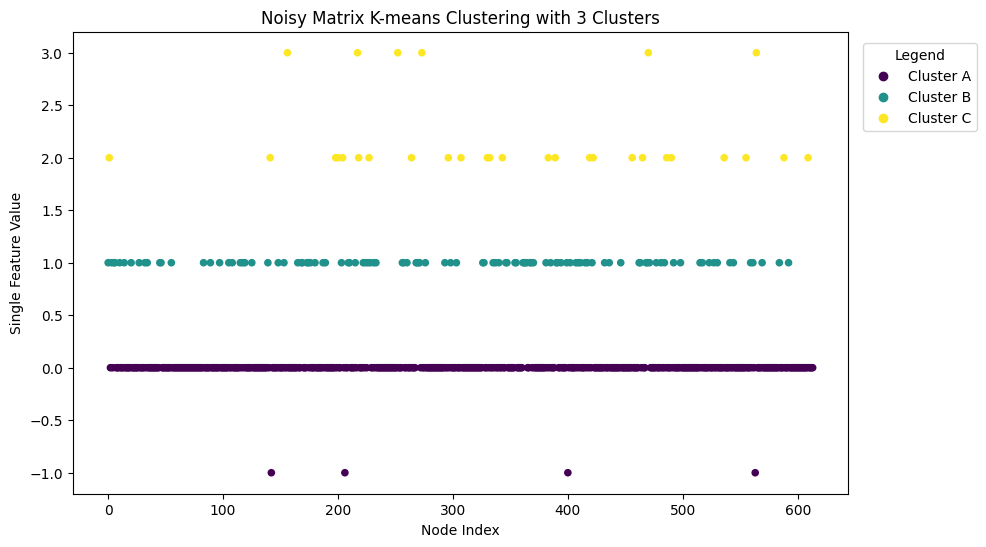

In [98]:
noisy_matrix_cluster_labels,noisy_matrix_single_values = K_means(noisy_feature_matrix,3,'Noisy Matrix K-means Clustering with 3 Clusters')

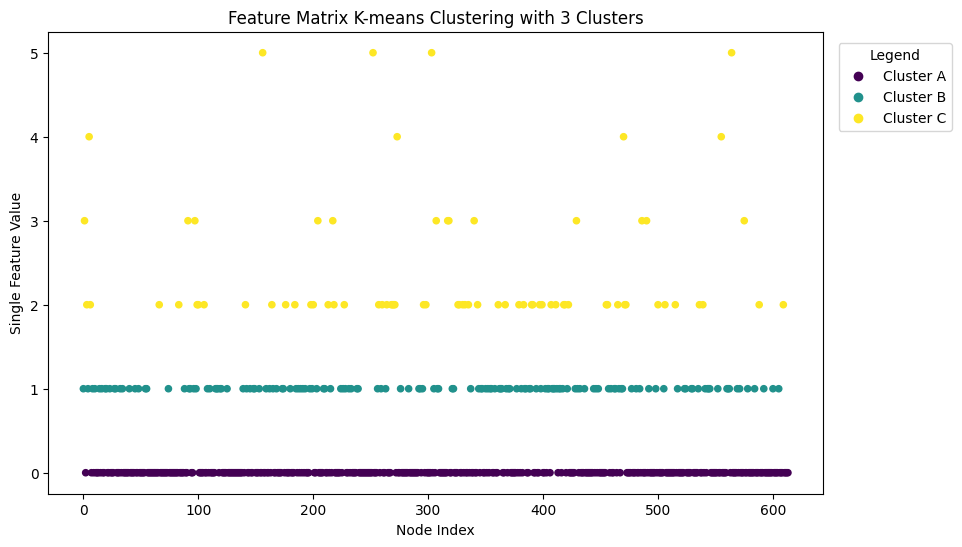

In [99]:
feature_matrix_cluster_labels,feature_matrix_single_values = K_means(feature_matrix,3,'Feature Matrix K-means Clustering with 3 Clusters')

# Accuracy Metrics

### 1. ARI - Adjusted Rand Index
The Adjusted Rand Index (ARI) is a metric used to evaluate the quality of clustering results. It measures the similarity between two sets of cluster assignments, typically the ground truth labels and the predicted labels.\
The ARI score ranges from -1 to 1, where:

* **ARI = 1** : Perfect clustering. The predicted labels are identical to the ground truth labels.
* **ARI ≈ 0** : Clustering is not much better than random chance.
* **ARI < 0** : Clustering is worse than random chance.

In [100]:
ari = adjusted_rand_score(feature_matrix_cluster_labels, noisy_matrix_cluster_labels)
print(f"Adjusted Rand Index: {ari}")

Adjusted Rand Index: 0.477752357737334


### 2. Silhouette Score
The Silhouette score is a metric used to assess the quality of clusters in unsupervised machine learning and clustering tasks. It measures how well-defined and separated the clusters are within your dataset. The score provides a quantitative measure of the extent to which each data point is similar to its own cluster (cohesion) compared to other clusters (separation).
* A Silhouette score close to 1 suggests that the object is well-matched to its own cluster and poorly matched to neighboring clusters. This indicates that the clustering is appropriate, and the clusters are well-separated.
* A Silhouette score around 0 indicates that the object is on or very close to the decision boundary between two neighboring clusters. In this case, it may be challenging to determine if the clustering is good or if the data points are overlapping.
* A Silhouette score close to -1 suggests that the object may have been assigned to the wrong cluster, as it is more similar to neighboring clusters than to its own. This indicates poor clustering quality, and the clusters are not well-separated.

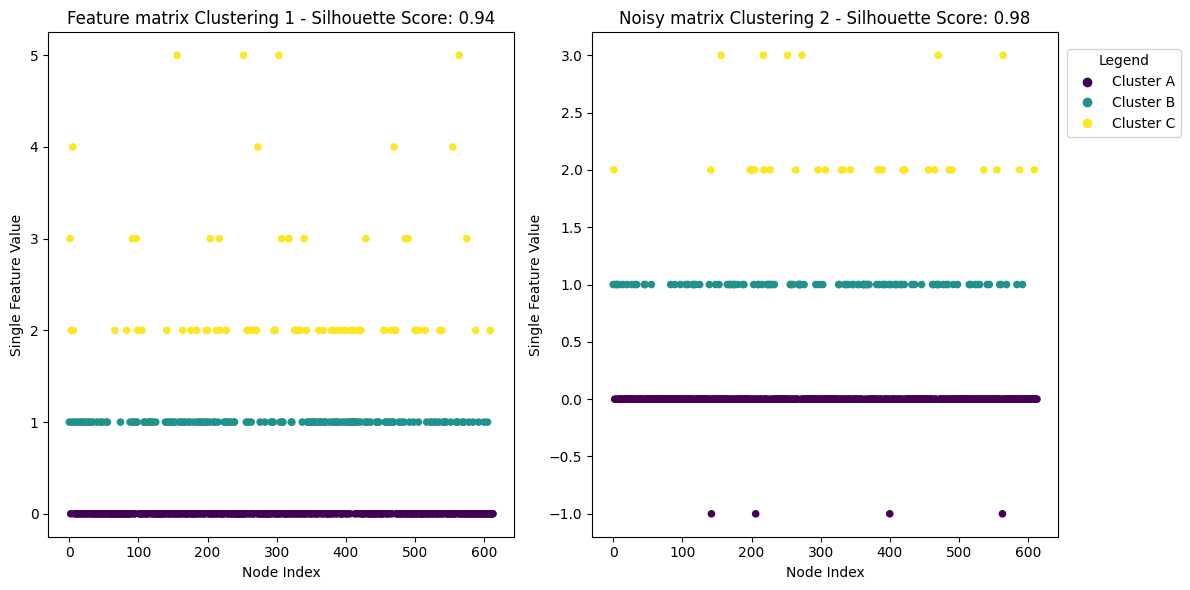

Silhouette Score for Clustering 1: 0.94
Silhouette Score for Clustering 2: 0.98
Clustering 2 is better.


In [101]:
import numpy as np
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Assuming you have cluster labels from two K-Means results

# Assuming you have your single feature values (single_value) as well

# Calculate Silhouette scores for both results
silhouette_score_1 = silhouette_score(feature_matrix_single_values, feature_matrix_cluster_labels)
silhouette_score_2 = silhouette_score(noisy_matrix_single_values, noisy_matrix_cluster_labels)

# Visualize the clustering results (you can customize this as needed)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(feature_matrix_single_values)), feature_matrix_single_values, c=feature_matrix_cluster_labels, cmap='viridis', marker='o', s=20)
plt.title(f'Feature matrix Clustering 1 - Silhouette Score: {silhouette_score_1:.2f}')
plt.xlabel('Node Index')
plt.ylabel('Single Feature Value')

plt.subplot(1, 2, 2)
scatter = plt.scatter(range(len(noisy_matrix_single_values)), noisy_matrix_single_values, c=noisy_matrix_cluster_labels, cmap='viridis', marker='o', s=20)
plt.title(f'Noisy matrix Clustering 2 - Silhouette Score: {silhouette_score_2:.2f}')
plt.xlabel('Node Index')
plt.ylabel('Single Feature Value')
clusters = ['Cluster A', 'Cluster B', 'Cluster C']
plt.legend(title="Legend",handles=scatter.legend_elements()[0],labels=clusters,bbox_to_anchor=(1.02, 0.88), loc='center left', borderaxespad=0)
plt.tight_layout()
plt.show()

# Compare the Silhouette scores
print(f'Silhouette Score for Clustering 1: {silhouette_score_1:.2f}')
print(f'Silhouette Score for Clustering 2: {silhouette_score_2:.2f}')

# Compare the clustering results based on Silhouette score
if silhouette_score_1 > silhouette_score_2:
    print("Clustering 1 is better.")
elif silhouette_score_2 > silhouette_score_1:
    print("Clustering 2 is better.")
else:
    print("Clustering 1 and Clustering 2 have the same quality.")


### 3. Misclusterred Points
Misclustered points are data instances erroneously assigned to incorrect clusters in a clustering task. They can result from factors like noise, ambiguous boundaries, or algorithmic limitations. Identifying and addressing misclustered points is essential for improving the accuracy and interpretability of clustering results.

In [102]:
dissimilarity_count = 0

for i in range(len(feature_matrix_cluster_labels)):
    if feature_matrix_cluster_labels[i] != noisy_matrix_cluster_labels[i] :
        dissimilarity_count+=1

print(dissimilarity_count,'/',len(feature_matrix_cluster_labels))

129 / 614


### 4. Davies-Bouldin Index
The Davies-Bouldin Index (DB) is a metric for evaluating the quality of clustering solutions, and its values do not have a specific range like the Silhouette score, which ranges from -1 to 1.

In the case of the Davies-Bouldin Index:
* Lower values of DB indicate better clustering quality. A lower DB value suggests that the clusters are more well-separated and distinct from each other.

* Higher values of DB indicate poorer clustering quality, where clusters are less well-separated and may have overlapping or less distinct boundaries.

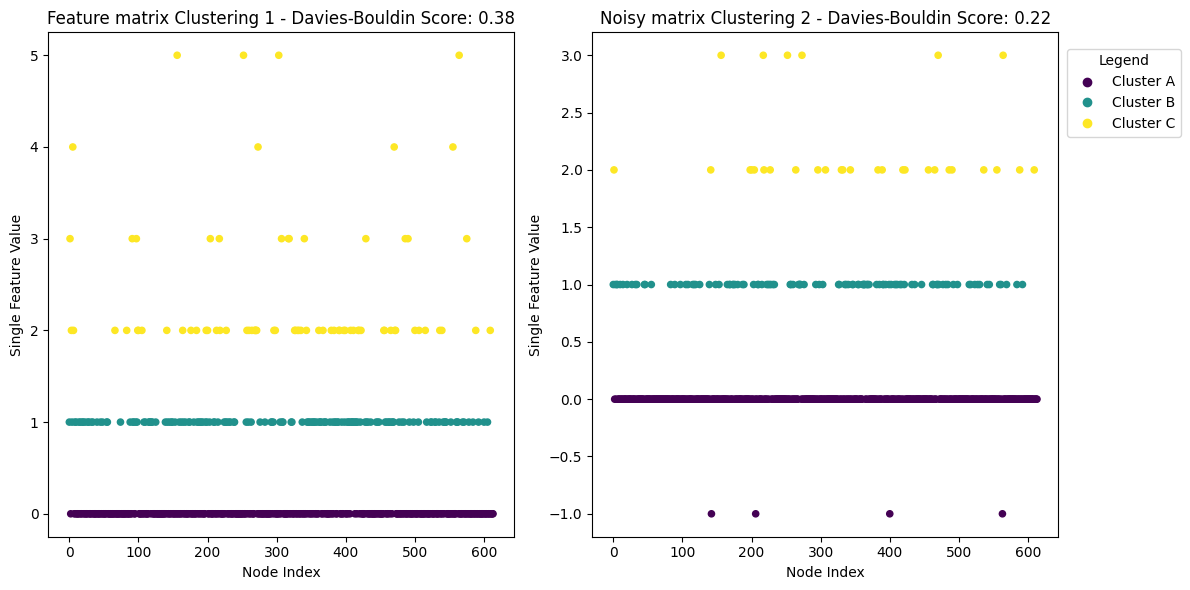

Davies-Bouldin Score for Clustering 1: 0.38
Davies-Bouldin Score for Clustering 2: 0.22
Clustering 2 is better.


In [103]:
# Calculate Davies-Bouldin Index scores for both results
davies_bouldin_score_1 = davies_bouldin_score(feature_matrix_single_values, feature_matrix_cluster_labels)
davies_bouldin_score_2 = davies_bouldin_score(noisy_matrix_single_values, noisy_matrix_cluster_labels)

# Visualize the clustering results (you can customize this as needed)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(feature_matrix_single_values)), feature_matrix_single_values, c=feature_matrix_cluster_labels, cmap='viridis', marker='o', s=20)
plt.title(f'Feature matrix Clustering 1 - Davies-Bouldin Score: {davies_bouldin_score_1:.2f}')
plt.xlabel('Node Index')
plt.ylabel('Single Feature Value')

plt.subplot(1, 2, 2)
scatter = plt.scatter(range(len(noisy_matrix_single_values)), noisy_matrix_single_values, c=noisy_matrix_cluster_labels, cmap='viridis', marker='o', s=20)
plt.title(f'Noisy matrix Clustering 2 - Davies-Bouldin Score: {davies_bouldin_score_2:.2f}')
plt.xlabel('Node Index')
plt.ylabel('Single Feature Value')

plt.legend(title="Legend",handles=scatter.legend_elements()[0],labels=clusters,bbox_to_anchor=(1.02, 0.88), loc='center left', borderaxespad=0)
plt.tight_layout()
plt.show()

# Compare the Davies-Bouldin Index scores
print(f'Davies-Bouldin Score for Clustering 1: {davies_bouldin_score_1:.2f}')
print(f'Davies-Bouldin Score for Clustering 2: {davies_bouldin_score_2:.2f}')

# Compare the clustering results based on Davies-Bouldin Index
if davies_bouldin_score_1 < davies_bouldin_score_2:
    print("Clustering 1 is better.")
elif davies_bouldin_score_2 < davies_bouldin_score_1:
    print("Clustering 2 is better.")
else:
    print("Clustering 1 and Clustering 2 have the same quality.")